# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
# URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?APPID=' + weather_api_key

#query_url = url + "appid=" + weather_api_key + "&q=" + city

In [78]:
response = requests.get(query_url)
data = response.json()
pprint(data)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 32.3526, 'lon': -90.8779},
 'dt': 1612912644,
 'id': 4449620,
 'main': {'feels_like': 293.26,
          'humidity': 60,
          'pressure': 1018,
          'temp': 294.15,
          'temp_max': 294.15,
          'temp_min': 294.15},
 'name': 'Vicksburg',
 'sys': {'country': 'US',
         'id': 6181,
         'sunrise': 1612875088,
         'sunset': 1612914248,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 100, 'speed': 2.57}}


In [92]:
# lists to hold items
city_name = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind = []

# set counter
counter = 1


for city in cities:
    try:
        response = (requests.get(url + '&q=' + city)).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f'City number {counter} of {len(cities)} complete. | Added {city}')
        counter = counter + 1
    
    except KeyError:
        print(f'Missing data in city number {counter} of {len(cities)}. | Skipping {city}')
        counter = counter + 1
        
    #finally:
        #break

City number 1 of 628 complete. | Added jamestown
City number 2 of 628 complete. | Added ushuaia
City number 3 of 628 complete. | Added honningsvag
City number 4 of 628 complete. | Added arcata
City number 5 of 628 complete. | Added marivan
City number 6 of 628 complete. | Added san patricio
City number 7 of 628 complete. | Added yellowknife
City number 8 of 628 complete. | Added kruisfontein
City number 9 of 628 complete. | Added punta arenas
City number 10 of 628 complete. | Added busselton
City number 11 of 628 complete. | Added nome
City number 12 of 628 complete. | Added cape town
City number 13 of 628 complete. | Added tazovskiy
City number 14 of 628 complete. | Added vicksburg
City number 15 of 628 complete. | Added nanortalik
City number 16 of 628 complete. | Added kapaa
Missing data in city number 17 of 628. | Skipping taolanaro
City number 18 of 628 complete. | Added esperance
City number 19 of 628 complete. | Added butaritari
City number 20 of 628 complete. | Added khani
City

City number 167 of 628 complete. | Added quatre cocos
Missing data in city number 168 of 628. | Skipping jahrom
City number 169 of 628 complete. | Added norman wells
City number 170 of 628 complete. | Added kavieng
City number 171 of 628 complete. | Added qasigiannguit
City number 172 of 628 complete. | Added cachoeirinha
City number 173 of 628 complete. | Added taldan
City number 174 of 628 complete. | Added jalcocotan
City number 175 of 628 complete. | Added chapais
City number 176 of 628 complete. | Added lavrentiya
City number 177 of 628 complete. | Added xinan
Missing data in city number 178 of 628. | Skipping zhetybay
City number 179 of 628 complete. | Added saskylakh
City number 180 of 628 complete. | Added oyugis
Missing data in city number 181 of 628. | Skipping nizhneyansk
City number 182 of 628 complete. | Added key largo
City number 183 of 628 complete. | Added lere
City number 184 of 628 complete. | Added guasdualito
City number 185 of 628 complete. | Added quilpue
City nu

City number 327 of 628 complete. | Added kuruman
City number 328 of 628 complete. | Added pilar
City number 329 of 628 complete. | Added ixtapa
City number 330 of 628 complete. | Added grand gaube
City number 331 of 628 complete. | Added okhotsk
City number 332 of 628 complete. | Added claveria
City number 333 of 628 complete. | Added haimen
City number 334 of 628 complete. | Added airai
City number 335 of 628 complete. | Added mezhdurechensk
City number 336 of 628 complete. | Added coihaique
City number 337 of 628 complete. | Added kodiak
City number 338 of 628 complete. | Added sechura
City number 339 of 628 complete. | Added acapulco
City number 340 of 628 complete. | Added miraflores
City number 341 of 628 complete. | Added hambantota
City number 342 of 628 complete. | Added brufut
City number 343 of 628 complete. | Added neiafu
City number 344 of 628 complete. | Added gopalganj
City number 345 of 628 complete. | Added ambulu
City number 346 of 628 complete. | Added payakumbuh
City

Missing data in city number 489 of 628. | Skipping gangotri
City number 490 of 628 complete. | Added geraldton
City number 491 of 628 complete. | Added cockburn town
City number 492 of 628 complete. | Added rosario do sul
City number 493 of 628 complete. | Added khingansk
City number 494 of 628 complete. | Added wahiawa
City number 495 of 628 complete. | Added zacualpan
City number 496 of 628 complete. | Added verkhnevilyuysk
City number 497 of 628 complete. | Added loiza
City number 498 of 628 complete. | Added lujan
City number 499 of 628 complete. | Added kanigiri
City number 500 of 628 complete. | Added mabaruma
City number 501 of 628 complete. | Added schwalmstadt
City number 502 of 628 complete. | Added sa kaeo
Missing data in city number 503 of 628. | Skipping wulanhaote
City number 504 of 628 complete. | Added lewistown
City number 505 of 628 complete. | Added pyapon
City number 506 of 628 complete. | Added patacamaya
City number 507 of 628 complete. | Added harper
City number 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [93]:
city_df = pd.DataFrame({'City': city_name,
                       'Latitude': lat,
                       'Longitude': lng,
                       'Temperature': temp,
                       'Humidity': humidity,
                       'Cloudiness': clouds,
                       'Wind': wind})

pd.DataFrame.to_csv(city_df, 'city_data.csv')

In [94]:
city_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind
0,Jamestown,42.0970,-79.2353,266.72,79,90,2.06
1,Ushuaia,-54.8000,-68.3000,294.15,68,40,1.03
2,Honningsvåg,70.9821,25.9704,268.15,58,40,11.32
3,Arcata,40.8665,-124.0828,284.66,81,75,3.09
4,Marivan,35.5219,46.1760,278.83,61,46,0.38


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [104]:
#  Get the indices of cities that have humidity over 100%.
city_df["Humidity"].max()

100

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [99]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

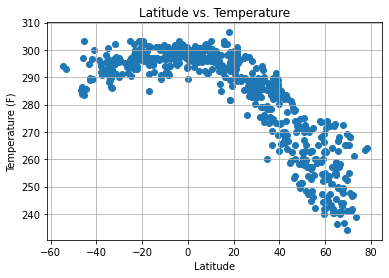

In [95]:
plt.scatter(city_df['Latitude'], city_df['Temperature'])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.savefig("latitude_temp.png")

## Latitude vs. Humidity Plot

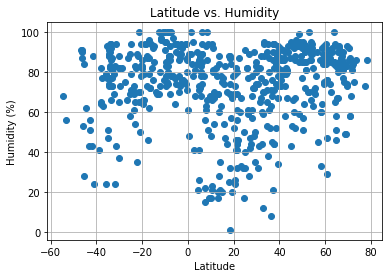

In [96]:
plt.scatter(city_df['Latitude'], city_df['Humidity'])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("latitude_humidity.png")

## Latitude vs. Cloudiness Plot

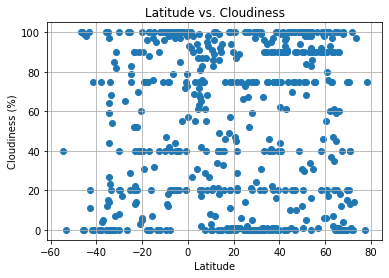

In [97]:
plt.scatter(city_df['Latitude'], city_df['Cloudiness'])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("latitude_cloudiness.png")

## Latitude vs. Wind Speed Plot

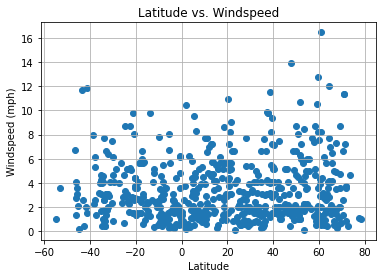

In [98]:
plt.scatter(city_df['Latitude'], city_df['Wind'])
plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)
plt.savefig("latitude_wind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression